# Pythonを使った数値計算の初歩
Create: 2018/02/06<br>
Author: drsenri (H. Shibata)

## 1. はじめに
このノートブックでは、Python (というよりもnumpy, pandas) での計算方法について学びます。<br>
数値計算の基本的な書き方、考え方を理解することが目的です。<br>
各々のメソッドの使用方法については、書籍やWebサイトを参照してください (本レポジトリのwikiに記載しています)。

## 2. ライブラリのインポート
まずは、数値計算ライブラリであるnumpy, pandasをインポートします (asを使って省略してnp, pdとするのが一般的)。<br>
下記のセルをCtrl+Enterで実行しましょう。

In [1]:
import numpy as np
import pandas as pd

## 3. numpyを使った計算例
いくつか数値計算の方法を見てみましょう。<br>
Python標準ライブラリとnumpyを比較し、numpyの基本的な書き方を理解しましょう。<br>
見るだけではなく、セルをコピーして自分で一部書き換えるなどして、実際に動かしながら理解度を高めましょう。

### 3-1. arrayを用いた計算の基本
numpyではarrayという配列もしくは行列を表現するデータ形式を使用します。

In [9]:
x = np.array([1, 2, 3])
np.mean(x) # 全要素の平均値を出力する

2.0

In [11]:
x = np.array([1, 2, 3])
np.power(x, 2) # 各要素の二乗のarrayを出力する

array([1, 4, 9], dtype=int32)

In [15]:
x = np.array([1, 2, 3])
np.where(x >= 2, 'a', 'b') # 各要素について、2以上なら'a', 2未満なら'b'に置き換えたarrayを出力する

array(['b', 'a', 'a'], 
      dtype='<U1')

### 3-2. for文はなるべく使わない
上記の計算をnumpyを使わず、標準ライブラリでfor文を使って実装してみましょう。<br>
numpyと比べて統一感や可読性が低く、処理速度も遅いコードになっています (numpyはC言語で実装されており、Pythonに比べて非常に高速です)。

In [13]:
x = [1, 2, 3]
res = 0
for i in x:
    res += i
print(res)

6


In [14]:
x = [1, 2, 3]
res = []
for i in x:
    res.append(i*i)
print(res)

[1, 4, 9]


In [16]:
x = [1, 2, 3]
res = []
for i in x:
    if i >= 2:
        res.append('a')
    else:
        res.append('b')
print(res)

['b', 'a', 'a']


### 3-3. ndarrayを使う
ndarrayとは、N-dimensional array, すなわち多次元配列を扱うクラスです。<br>
2次元であれば行と列を持ち、RDBのような構造を持ったデータを表現することができます。

In [23]:
x = np.array([[1, 2, 3], [4, 5, 6]])
x

array([[1, 2, 3],
       [4, 5, 6]])

In [28]:
x = np.array([[1, 2, 3], [4, 5, 6]])
np.mean(x) # 全要素の平均値を出力する

3.5

In [27]:
x = np.array([[1, 2, 3], [4, 5, 6]])
np.shape(x) # ndarrayの次元数を出力する

(2, 3)

In [30]:
x = np.array([[1, 2, 3], [4, 5, 6]])
x[0] # 1行目を出力する

array([1, 2, 3])

### 3-4. DataFrameを使う
DataFrameとは、pandasのクラスで、行名や列名を持った二次元データです。<br>
列名検索、グラフ描画、ファイルの入出力といった可視化のインターフェースを備えている点も特長です。<br>
大規模なデータであれば、ndarrayよりも使いやすい場合が多いです。

In [32]:
x = pd.DataFrame([[1, 2, 3], [4, 5, 6]])
x

,0,1,2
0,1,2,3
1,4,5,6


In [33]:
x = pd.DataFrame([[1, 2, 3], [4, 5, 6]], columns= ['a', 'b', 'c']) # 列名を付与
x

,a,b,c
0,1,2,3
1,4,5,6


In [35]:
x = pd.DataFrame([[1, 2, 3], [4, 5, 6]], columns= ['a', 'b', 'c'])
x[['b']] # b列のみを抽出

,b
0,2
1,5


In [40]:
x = pd.DataFrame([[1, 2, 3], [4, 5, 6]], columns= ['a', 'b', 'c'])
x.apply(np.sum, axis = 0) # 列方向にnp.sum (合算) を適用する。axis=1にすると行方向に適用する

a    5
b    7
c    9
dtype: int64

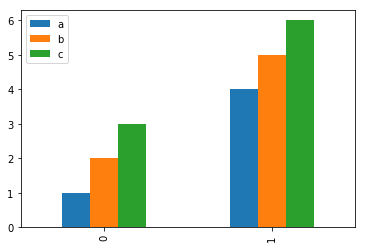

In [47]:
# %以下、プロット画像をノートブックに埋め込むマジックコマンド (一般的にはノートブックの上部のセルに記述する)
%matplotlib inline
x.plot.bar() # 行ごとに数値を棒グラフ化

In [48]:
x = pd.DataFrame([[1, 2, 3], [4, 5, 6]], columns= ['a', 'b', 'c'])
x.T # 転置する

,0,1
a,1,4
b,2,5
c,3,6


## 4. 練習問題
以下の場合について考えてみましょう。